# Predicting Diamond Prices

#### Group Name: Group 14

#### Name(s) & ID(s) of Group Members:

#### Ahamd Akkad s3920007 
#### Faysal Abdiwahab s3783895


*** 

## Table of Contents
* [Introduction](#Introduction) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
    + [Retrieving the data](#Retrieving-the-data)
    + [Data Cleaning](#Data-Cleaning)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
    + [Univariate Visualisation](#Univariate-Visualisation)
    + [Two-Variable Visualisation](#Two-VariableVisualisation)
    + [Three-Variable Visualisation](#Three-Variable-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)

***

## Introduction 
---

### Dataset Source

The 'Diamonds' dataset used in study was sourced from Dr. Vural Asakalli’s dataset folder on Github. This dataset contains the prices of various diamonds between 326 and 18,000 USD using its measurements.

### Dataset Details

This dataset contains prices of various diamonds based on their colour, clarity, size, cut as well as its overall dimensions. Using these features, we can perform a regression to predict the price of diamonds.

Within this dataset, there are a total of 10 features and 53940 observations. 

Some features to note are:

##### Diamond Cut Variable

The data describes the cut of the diamond; Fair, Good, Very Good, & Ideal. Cut is an order assigned describing the quality of the diamond cut. 

##### Diamond Color Variable

The data describes the color and has seven classes: D, E, F, G, H, I, J in order from colorless to light yellow

##### Diamond Clarity Variable

The data describes clarity and contains eight grades: IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1 in descending order of clarity in the stone.

### Dataset Features

In [100]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'], ['carat', 'Numerical', 'g', 'The weight of the diamond.'], ['cut', 'Ordianl catagorical','NA','Diamond cut is how well a diamond is cut and polished.'], ['color', 'Ordinal catagorical', 'NA', 'The color of the diamond refers how clear or yellow it is.'], ['clarity', 'Ordinal catagorical','NA', 'The purity of the diamond.'], ['depth', 'Numerical', 'Percentage', 'The measurement of a diamond from top to botton.'], ['table', 'Numerical', 'Percentage', 'Table is the flat facet of the diamond seen when the stone is face up.'], ['x', 'Numerical', 'mm','The width of the diamond.'],['y', 'Numerical', 'mm', 'The length of the diamond.'], ['z', 'Numerical','mm','The height of the diamond.'],['price', 'Numerical','US', 'The price of the diamond.']]
print(tabulate(table, headers='firstrow', tablefmt='simple'))

Name     Data Type            Units       Description
-------  -------------------  ----------  ----------------------------------------------------------------------
carat    Numerical            g           The weight of the diamond.
cut      Ordianl catagorical  NA          Diamond cut is how well a diamond is cut and polished.
color    Ordinal catagorical  NA          The color of the diamond refers how clear or yellow it is.
clarity  Ordinal catagorical  NA          The purity of the diamond.
depth    Numerical            Percentage  The measurement of a diamond from top to botton.
table    Numerical            Percentage  Table is the flat facet of the diamond seen when the stone is face up.
x        Numerical            mm          The width of the diamond.
y        Numerical            mm          The length of the diamond.
z        Numerical            mm          The height of the diamond.
price    Numerical            US          The price of the diamond.


### Target Feature

For this project, the target feature being used will be the price of the diamond in US dollars, which will be predicted based on the aforementioned descriptive features. 
 

## Goals and Objectives

 
The process of pricing diamonds is extremely complex and is influenced by multiple factors such as carat, cut, color, and shape. 

Understanding the way diamond prices are determined is extremely beneficial and the aim of this project is to build a predictive model that will help build that understanding.
 
 
Additionally, we will be visualising the dataset in order to analyse the correlation between the various descriptive features and the price.


## Data Cleaning and Preprocessing

### Retrieving the data

- Read the dataset from the csv file using pandas 
- Display 5 randomly sampled rows

In [105]:
import pandas as pd
pd.set_option('display.max_columns', None) 
df = df.style.set_precision(3)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('diamonds.csv')

df.sample(5, random_state=100)

,carat,cut,color,clarity,depth,table,x,y,z,price
52264,0.57,Ideal,E,VS2,61.5,57.0,5.35,5.32,3.28,2491
21073,1.16,Ideal,G,VS1,61.5,55.0,6.75,6.81,4.17,9248
42161,0.51,Ideal,G,SI1,63.2,58.0,5.05,5.08,3.20,1284
35974,0.42,Ideal,F,VS1,60.6,56.0,4.83,4.87,2.94,921
7641,0.80,Premium,G,IF,62.6,58.0,5.89,5.93,3.70,4268


### Data Cleaning

* Check if the column types match the description from the table above
* Check for missing / unusual values
* Check for outliers
* Remove all the rows with unusual values and outliers
* Random sampling of the dataset for 500 rows

Check the data types and observe that they match the intended data 


In [75]:
print('The shape of the diaomnd dataframe is', df.shape)
print('The "objects" data are ordinal catagorical:\n')
print(df.dtypes)

The shape of the diaomnd dataframe is (53940, 10)
The "objects" data are ordinal catagorical:

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


Check for any unusual values within the dataset

In [76]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


As shown by the description, the minimum values for "x", "y" and "z" are zero, this indicates invalid values in the data. That is, for a diamond, if either one of those values are null, it means the diamond is 2 dimensional, and if two of those values are null, it means the diamond is dimensionless. We will be correcting this error by removing those 0 values to make sense of the data. 

In [77]:
df = df.drop(df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)].index)

Checking for zeros again

In [78]:
df.describe()

,carat,depth,table,x,y,z,price
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,5.731627,5.734887,3.540046,3930.993231
std,0.473795,1.432331,2.234064,1.119423,1.140126,0.702530,3987.280446
min,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,949.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5323.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000




Ok, now that the 0 values have been removed, let's quickly analyse the current table. 

The maximum value for the 'carat' column has a value of 5.01, which may to be too large considering the 75th percentile has a value of 1.04, and the standard deviation (0.47). This means that the maximum value for this column is more than eight standard deviations from the 75th percentile, which is definitely a big difference. This diamond with a carat of 5.01 may be an outlier and will be handled in the next part.  


For the next columns, depth, and table, since these two features are percentages, and the values should be between 0 and 100, which is the case here, so nothing needs to be done to them.

Now looking at the price column; which is our target.
The cheapest diamond has a price of 326 USD, the average price is almost 3932 USD, and the most expensive diamond has a price of 18,823 USD.
To check whether or not the maximum price is an outlier, we need to check how far this value is from the 75th percentile: 
(18,823 - 5,324.25) / 3,989.4 = 3.38 standard deviations.
Given the variability of the diamond prices, this most likely won't be an outlier. 


----
Before handling the outliers, we'll quickly check for empty values.

In [79]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

None, great. Now let's check for outliers discussed above and remove them in one block of code. 
Here, what we're doing is calculating the upper and lower bounds then, for every column, dropping all the values above and below the bounds from the dataframe. 

In [80]:
df_IQR = df.quantile(.75) - df.quantile(.25)
df_lower = df.quantile(.25) - df_IQR * 1.5
df_upper = df.quantile(.75) + df_IQR * 1.5
df = df.drop(df[(df['carat'] < df_lower[0]) | (df['depth'] < df_lower[1]) 
| (df['table'] < df_lower[2])| (df['x'] < df_lower[3]) | 
(df['y'] < df_lower[4]) | (df['z'] < df_lower[5]) | (df['price'] < df_lower[6])].index)

df = df.drop(df[(df['carat'] > df_upper[0]) | (df['depth'] > df_upper[1]) 
| (df['table'] > df_upper[2])| (df['x'] > df_upper[3]) | 
(df['y'] > df_upper[4]) | (df['z'] > df_upper[5]) | (df['price'] > df_upper[6])].index)

Now that all of the outliers have been removed we can move start integer encoding the ordinal descriptive features, starting with 'cut' 

In [81]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

As shown by the unique values in the column, the values in the column range from 'Fair' to 'Ideal', meaning it has a clear order. In order to work with our dataset we'll change these to numbers that fall between 0 and 4.  

First we need to create a copy of our dataset, just in case. This dataframe is what we'll be working with from now on. 

In [82]:
df_copy = df.copy() 


We can map each value to a number by putting it into a dictionary, then replacing the original values with the new ones defined in the dictionary

In [83]:
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4 }
df_copy['cut'] = df['cut'].replace(cut_mapping)

The same process is done for the rest of the columns that need to be adjusted.

In [84]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [85]:
color_mapping = {'J' : 0, 'I' : 1, 'H' : 2, 'G': 3, 'F' : 4, 'E' : 5, 'D': 6}
df_copy['color'] = df['color'].replace(color_mapping)

In [86]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [87]:
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
df_copy['clarity'] = df['clarity'].replace(clarity_mapping)

## Random sampling 

Our dataset cointains more than 50,000 rows. In order to work with it properly, we'll create a sample of 500 random rows, place it in the copy dataframe and use it for the rest of this project. 

In [88]:
df_copy = df_copy.sample(n=500, random_state=105)
print(df_copy.sample(5, random_state=105))
print(df_copy.shape)

       carat  cut  color  clarity  depth  table     x     y     z  price
49224   0.58    2      5        4   62.9   54.0  5.31  5.34  3.35   2082
18635   1.01    4      6        3   62.6   54.0  6.46  6.42  4.03   7602
14106   1.03    3      2        3   61.8   58.0  6.48  6.43  3.99   5722
37155   0.32    4      6        3   61.0   57.0  4.46  4.42  2.71    972
39805   0.38    4      4        6   62.4   54.0  4.66  4.70  2.92   1096
(500, 10)


## Data Exploration and Visualisation

### Univariate Visualisation

#### Histogram of Diamond Prices

We can see in Figure 1A that the distribution of price is right-skewed with a majority in the lower price range, which indicates the price variable may need to be transformed. 

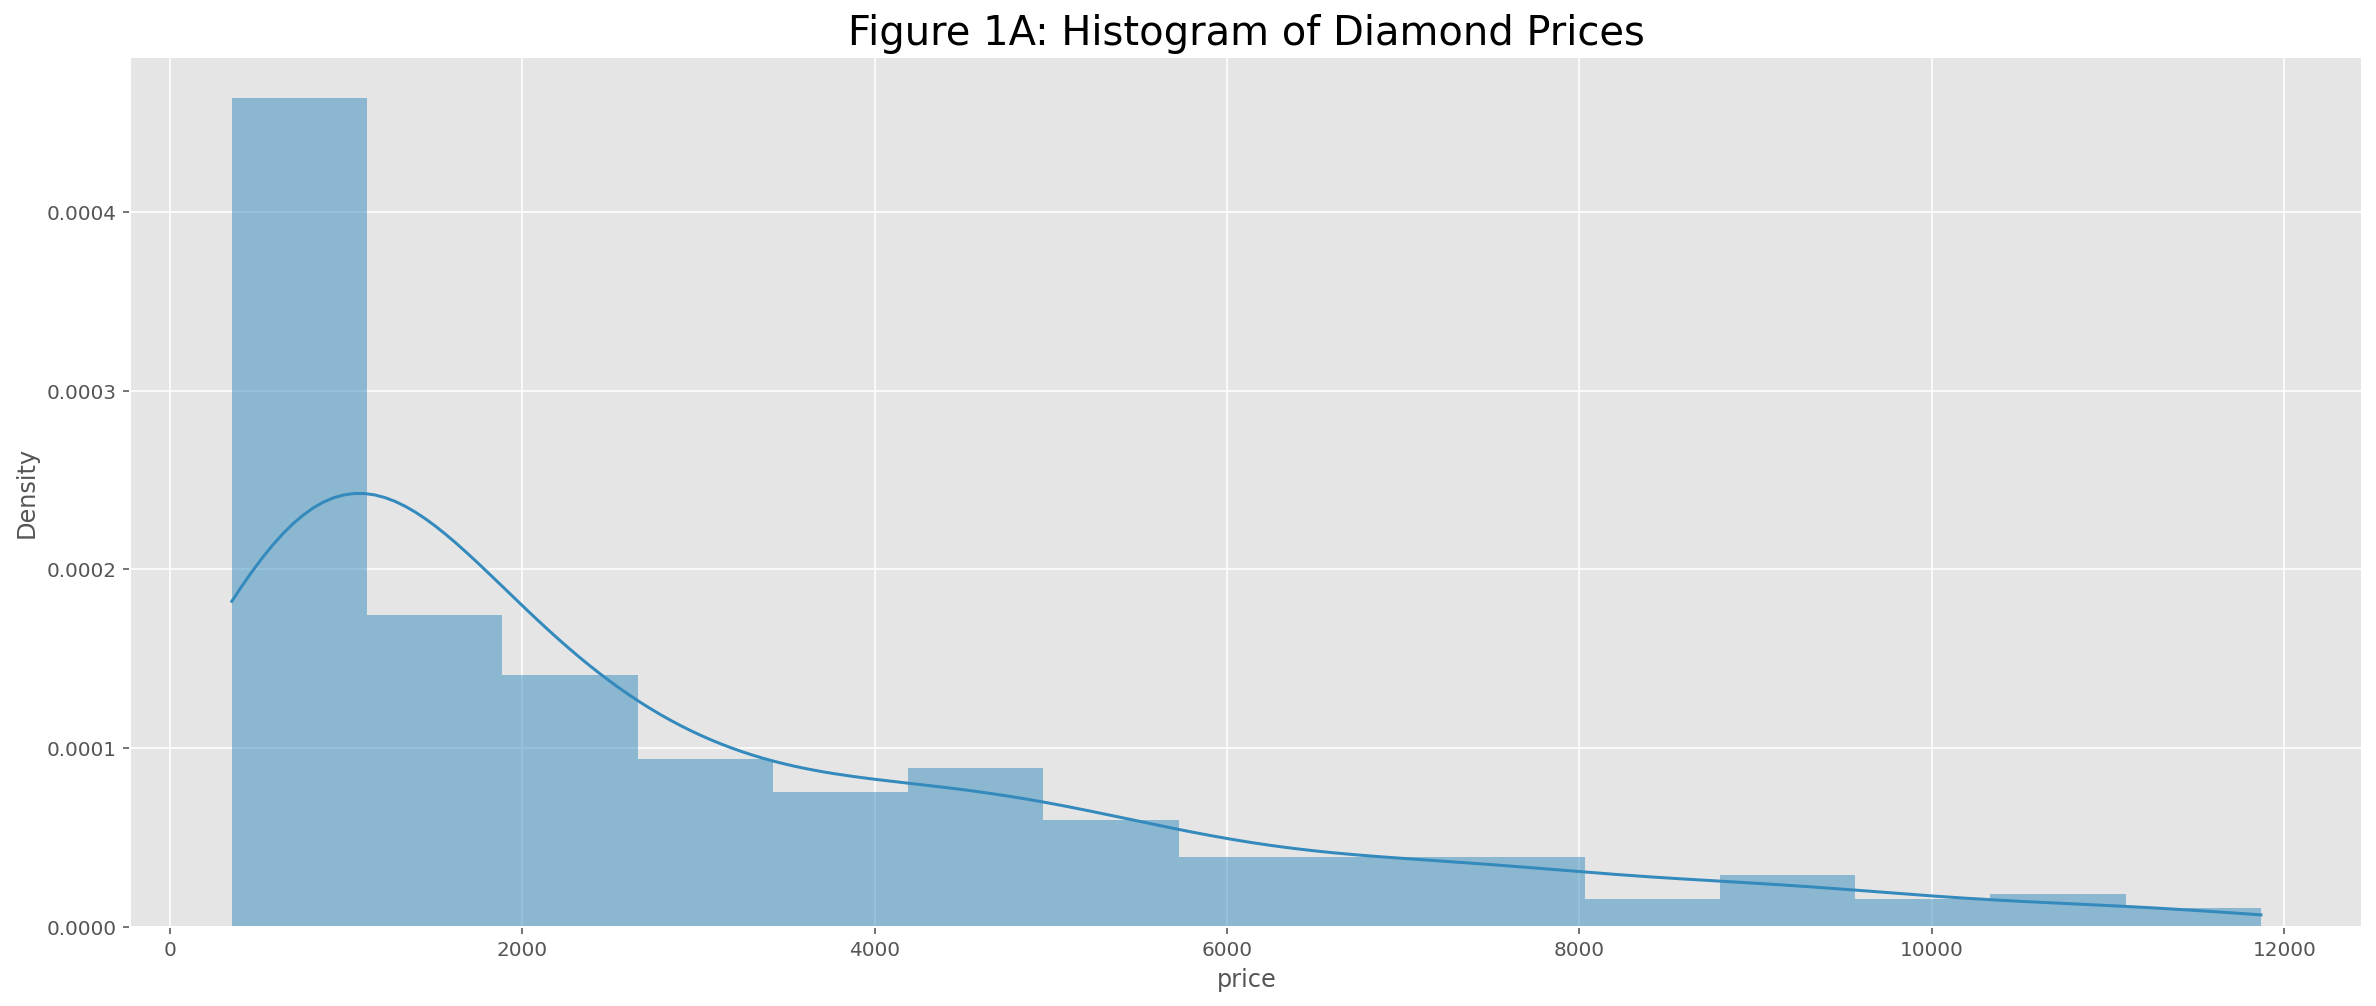

In [89]:
plt.figure(figsize = (20,8))
sns.histplot(df_copy['price'], kde=True, bins=15, stat="density", linewidth=0).set_title('Figure 1A: Histogram of Diamond Prices', fontsize = 20)
plt.show();

#### Boxplot of diamond carats

Figure 1B shows the distribution of carat is also very right-skewed, with a median of around 0.55g and an IQR of 0.6g

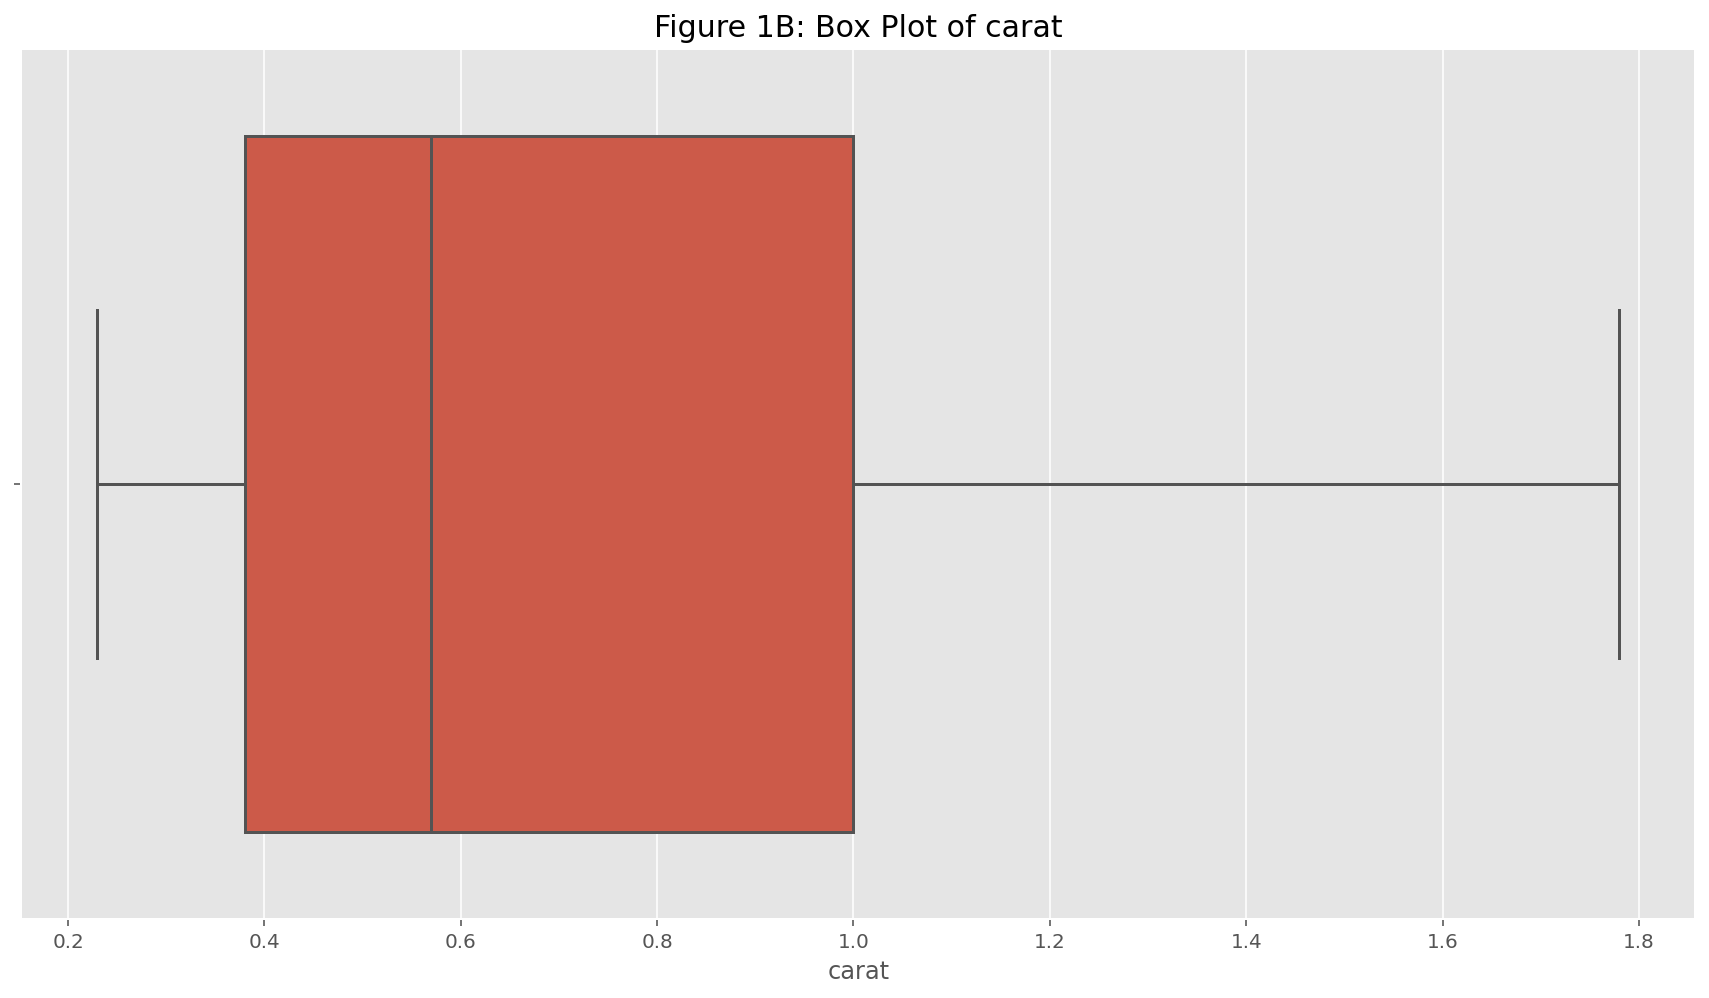

In [90]:
plt.figure(figsize = (15,8))
sns.boxplot(x=df_copy['carat']).set_title('Figure 1B: Box Plot of carat', fontsize = 15)
plt.show();

#### Color-quality count of diamonds

Figure 1C depicts the count of the color quality in the diamonds in descending order. As seen in this bar chart, most diamonds fall under a color grade of 3, which represents 'G'. 

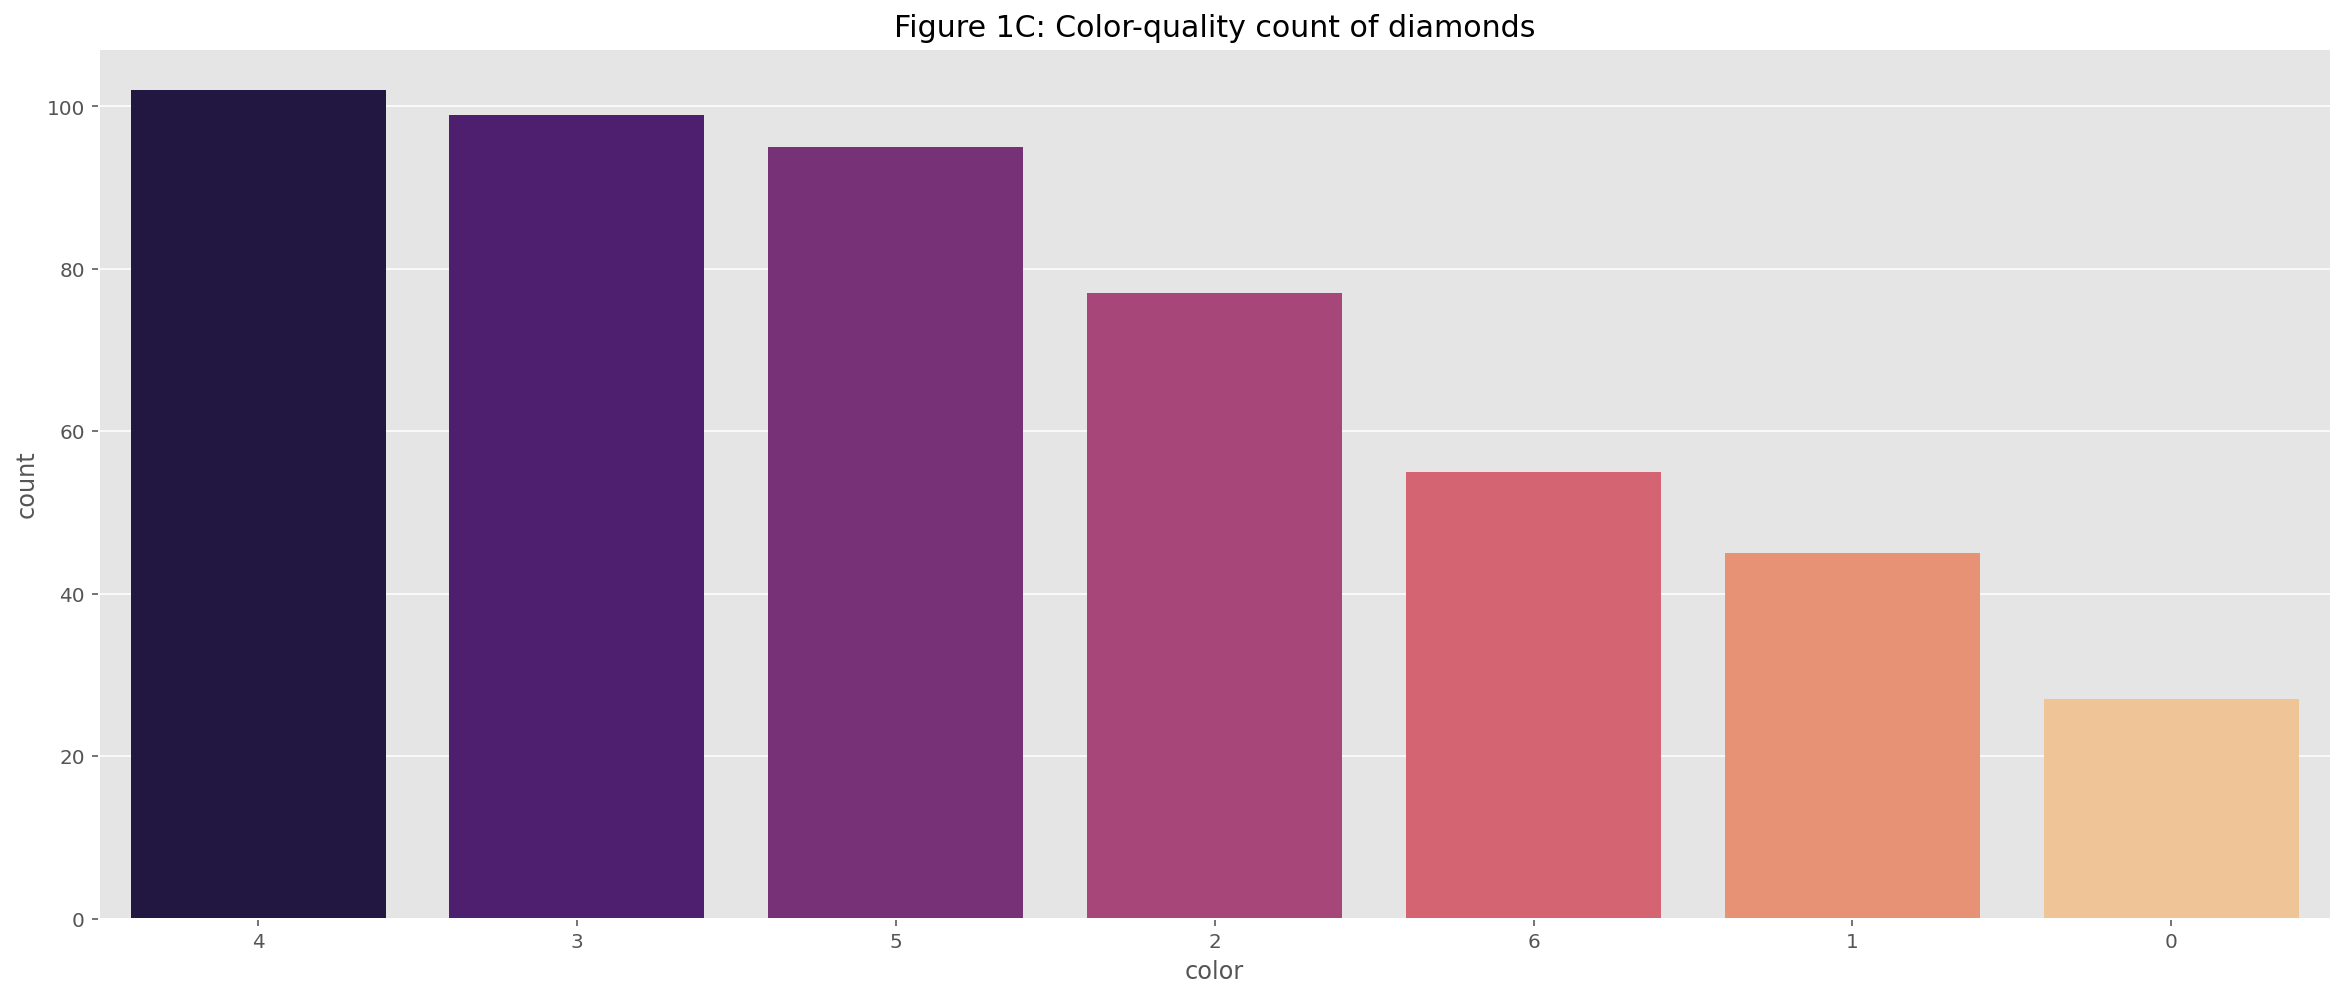

In [101]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'color', data = df_copy, palette = 'magma', order = df_copy['color'].value_counts().index)
fig = plt.title('Figure 1C: Color-quality count of diamonds', fontsize = 15)
plt.show()


### Two-Variable Visualisation


#### Scatterplot of Price against width of the diamonds

Figure 2A shows that there is a strong positive correlation between the width of the diamond and price. As the width increases, the price tends to be higher. However, the slight curve in the graph indicates that a transformation may need to be conducted on the data at a later stage.

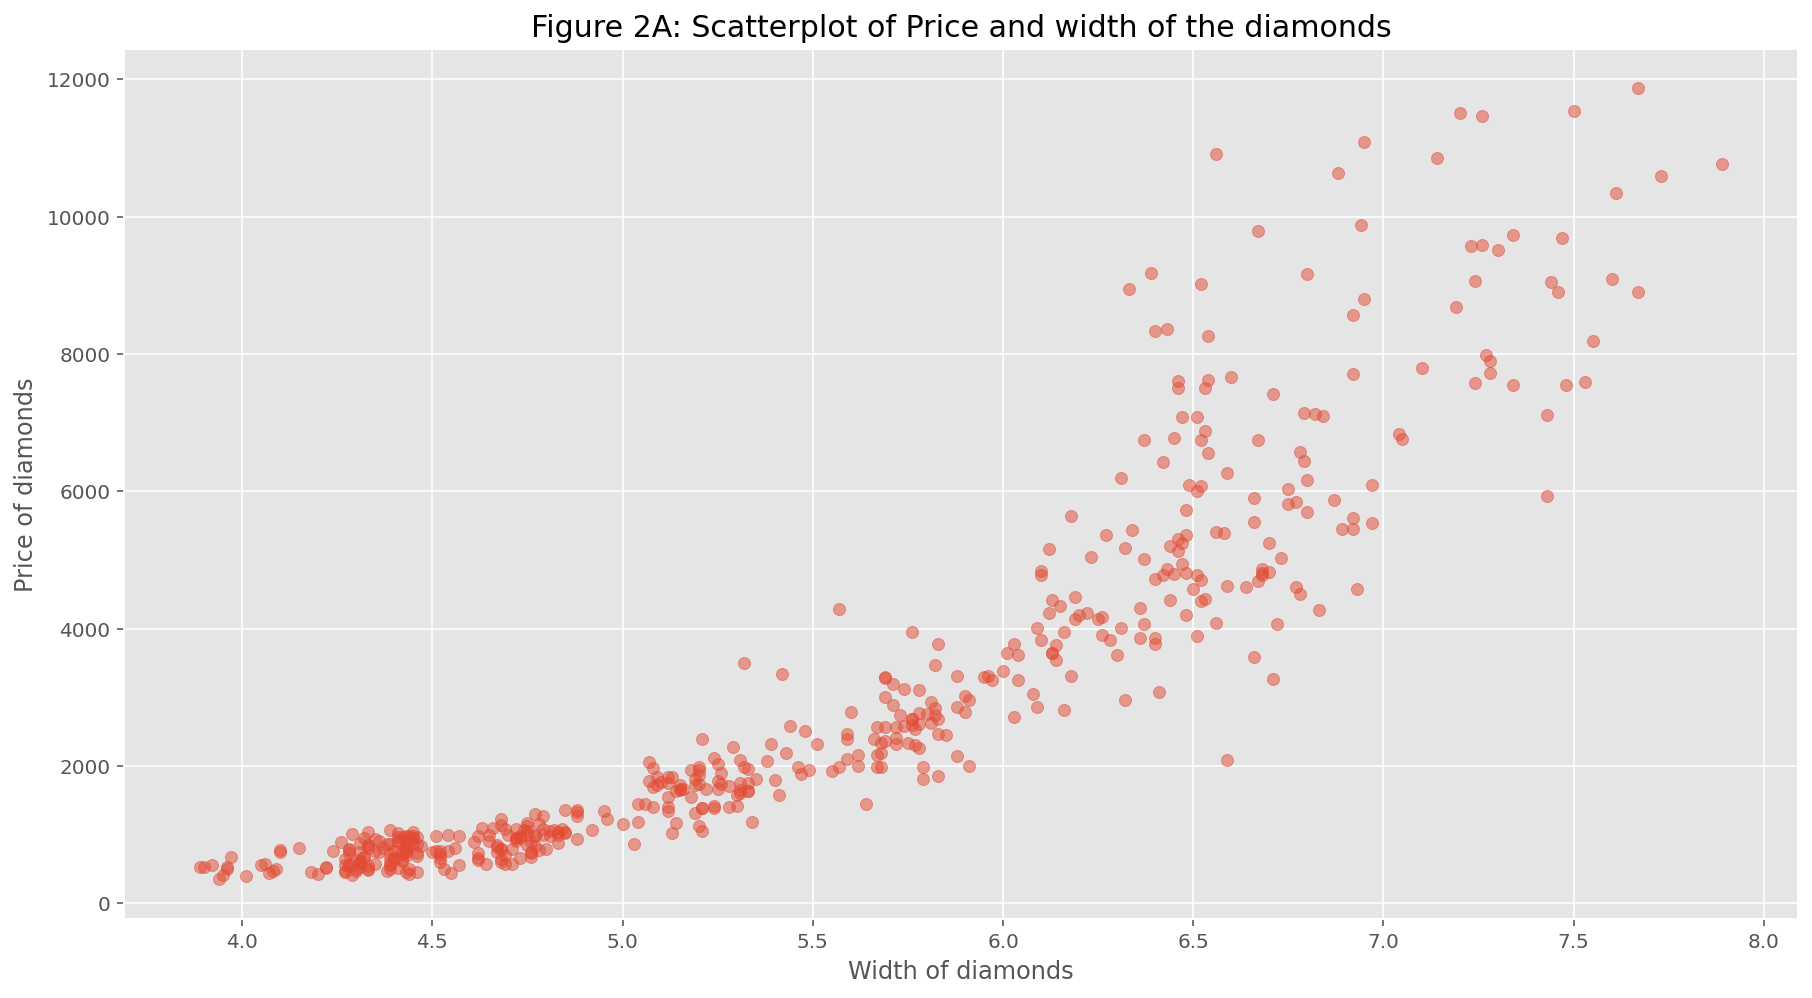

In [92]:
plt.figure(figsize = (15,8))
plt.scatter(df_copy['x'], df_copy['price'], alpha = 0.5)
plt.title('Figure 2A: Scatterplot of Price and width of the diamonds', fontsize = 15)
plt.xlabel('Width of diamonds')
plt.ylabel('Price of diamonds')
plt.show();

#### Scatterplot of price against depth of diamonds

Figure 2B depicts another scatterplot, this time looking at the depth of the diamond (in percentage) against price.
There is an obivious lack of a clear trend here, which indicates that there is no corelation between the 2 variables. That is, the depth of a diamond has no bearing on a diamond's worth.

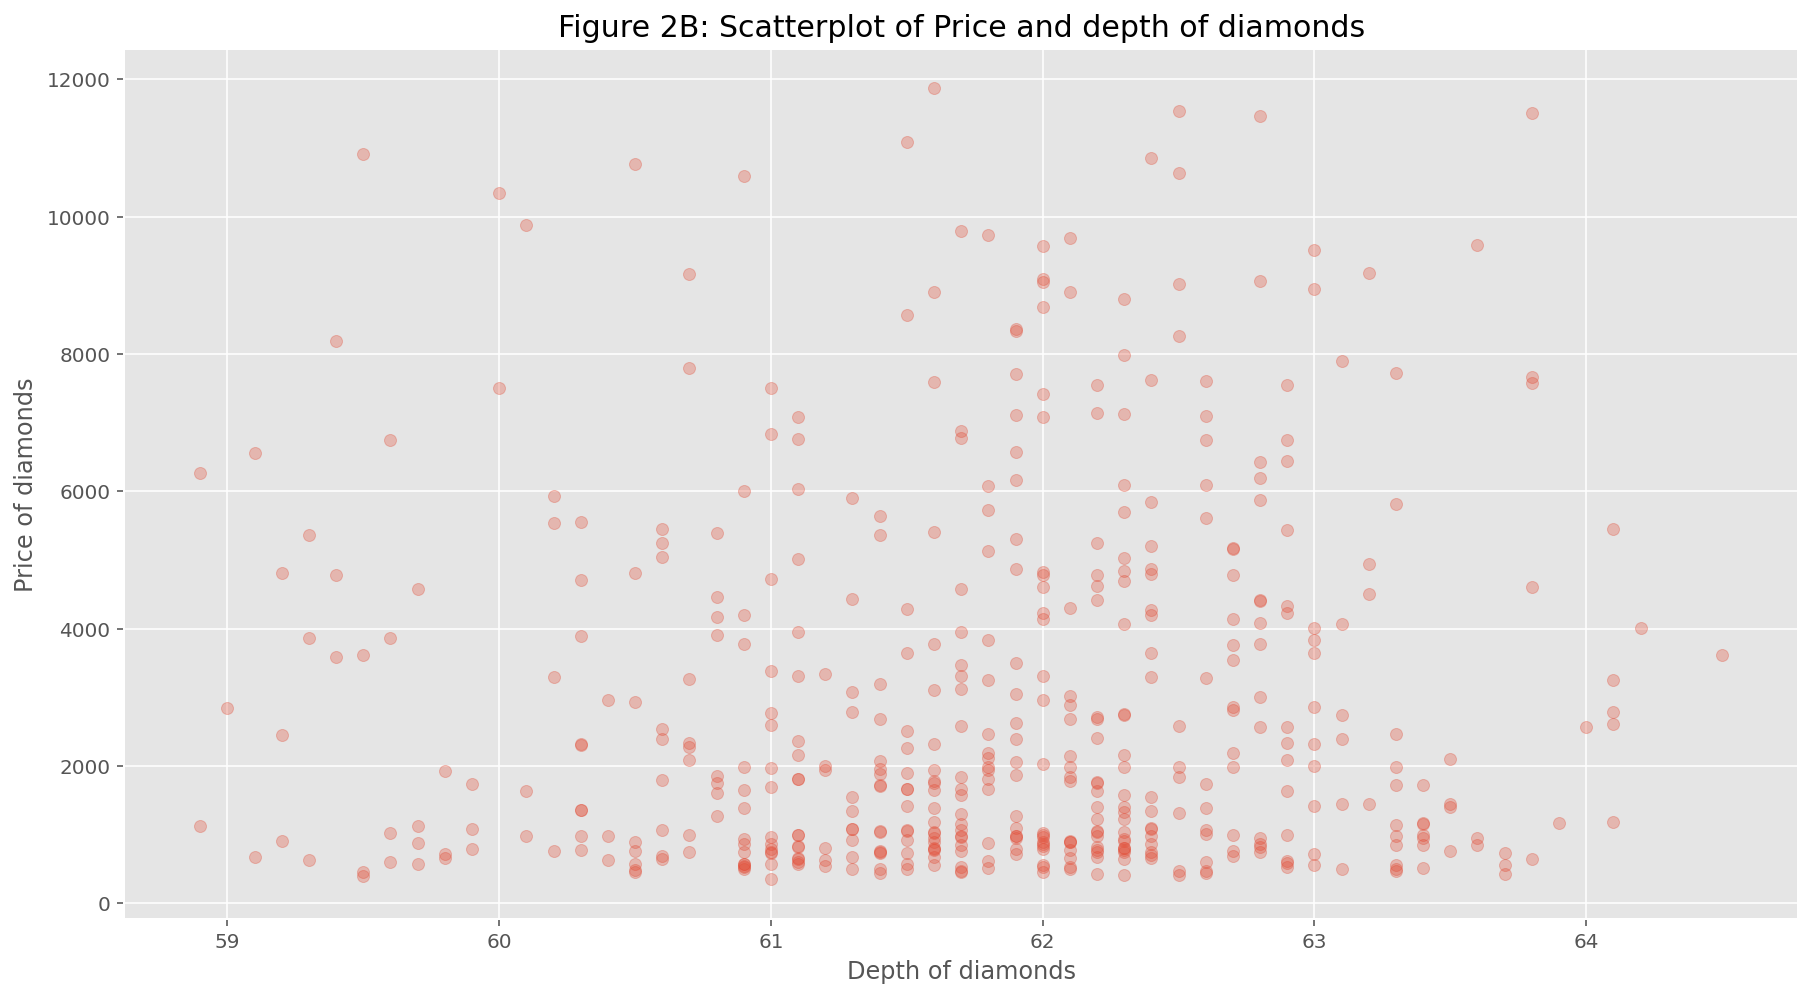

In [93]:
plt.figure(figsize = (15,8))
plt.scatter(df_copy['depth'], df_copy['price'], alpha = 0.3)
plt.title('Figure 2B: Scatterplot of Price and depth of diamonds', fontsize = 15)
plt.xlabel('Depth of diamonds')
plt.ylabel('Price of diamonds')
plt.show();

#### Boxplot of diamond price by cut

Looking at Figure 2C, the boxplots depict the cut (fair (0), good (1), very good (2), premium (3), ideal( 4)) vs price along with outliers. 

Good, very good and premium diamonds cost around the same price with the median for good and very good being the same at 2000 USD. Overall ideal cut diamonds seem to cost less than the previously mentioned cuts, with it's median sitting at less <2000 USD. This goes against what we would have thought it would look like. Fair cut diamonds, however, are lower in price than the rest, which is what was expected. The very good cut has the highest range  between the 1st and 3rd quartile. 

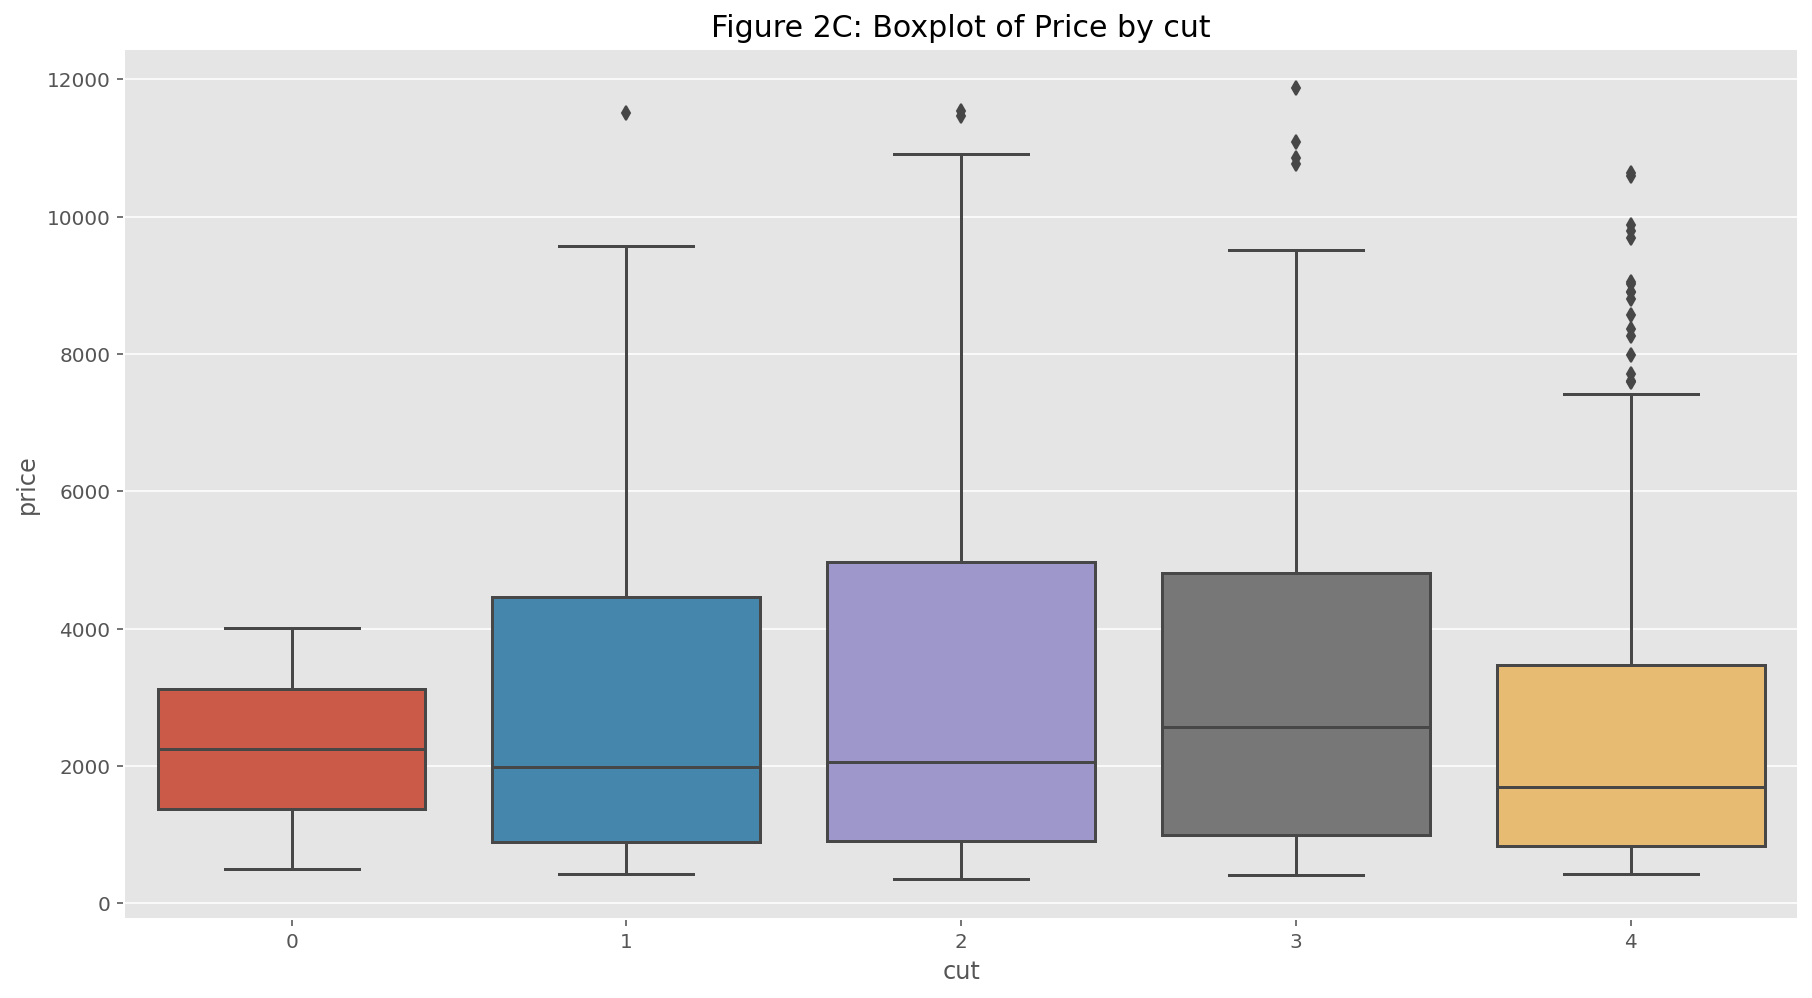

In [98]:
plt.figure(figsize = (15,8))
sns.boxplot(x=df_copy['cut'], y=df_copy['price']);
plt.title('Figure 2C: Boxplot of Price by cut', fontsize = 15)
plt.show();

### Three-Variable Visualisation

#### Scatterplot of price by height and color

Figure 3A shows that a diamond with color-quality of 6 is less likely to have a height of 4-4.5 than a color of 0-1, based on the clustering of the red points in the lower left corner of the plot.

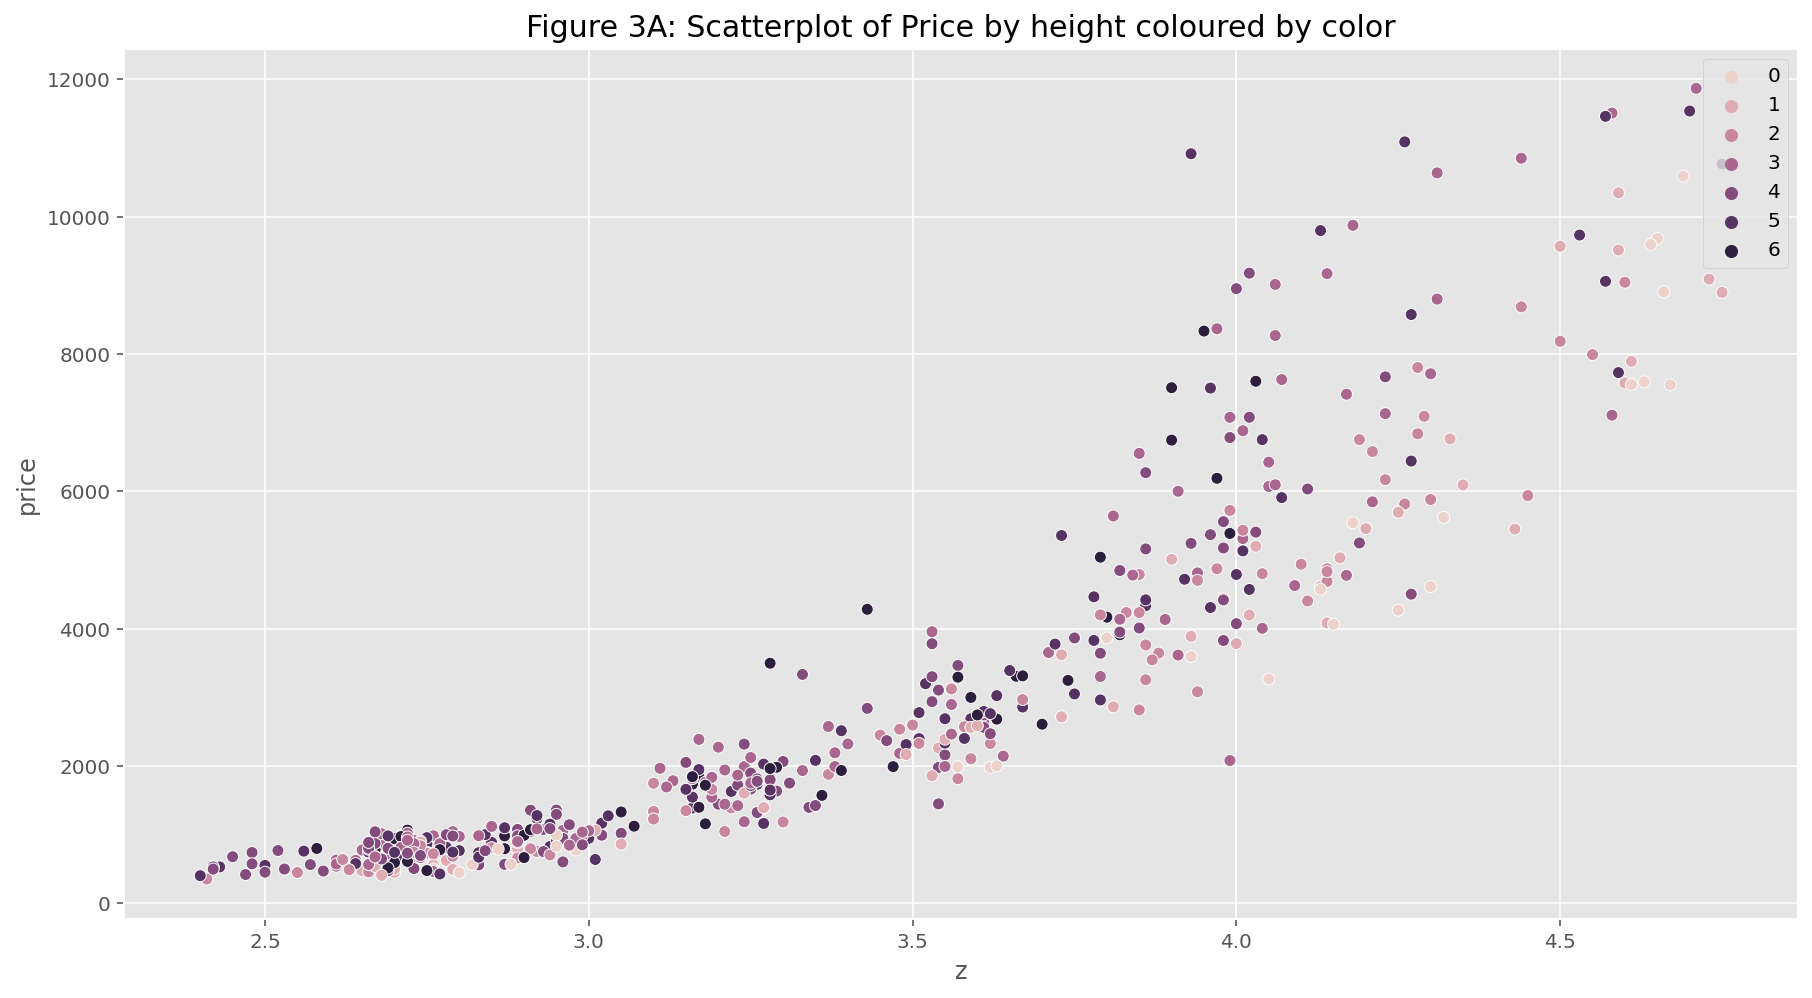

In [95]:
plt.figure(figsize = (15,8))
sns.scatterplot(x=df_copy['z'], y=df_copy['price'], hue = df_copy['color'])
plt.title('Figure 3A: Scatterplot of Price by height coloured by color', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

#### Barplots of Price by cut and clarity

For figure 3B, between the cut of a diamond and the clarity of a diamond, there is no clear pattern regarding which is more responsible for the change in price. The most expensive diamond according to this barplot is one with cut grade of 1, and a clarity grade of 3. 
The same is the case for figure 3C, where color grade, and clarity are measured for their price. The is no obvious correlation to note, and, again, the most expensive diamond depicted is a low tier color grade (0) with high tier clarity (6) 

Text(0, 0.5, 'Diamond Prices')

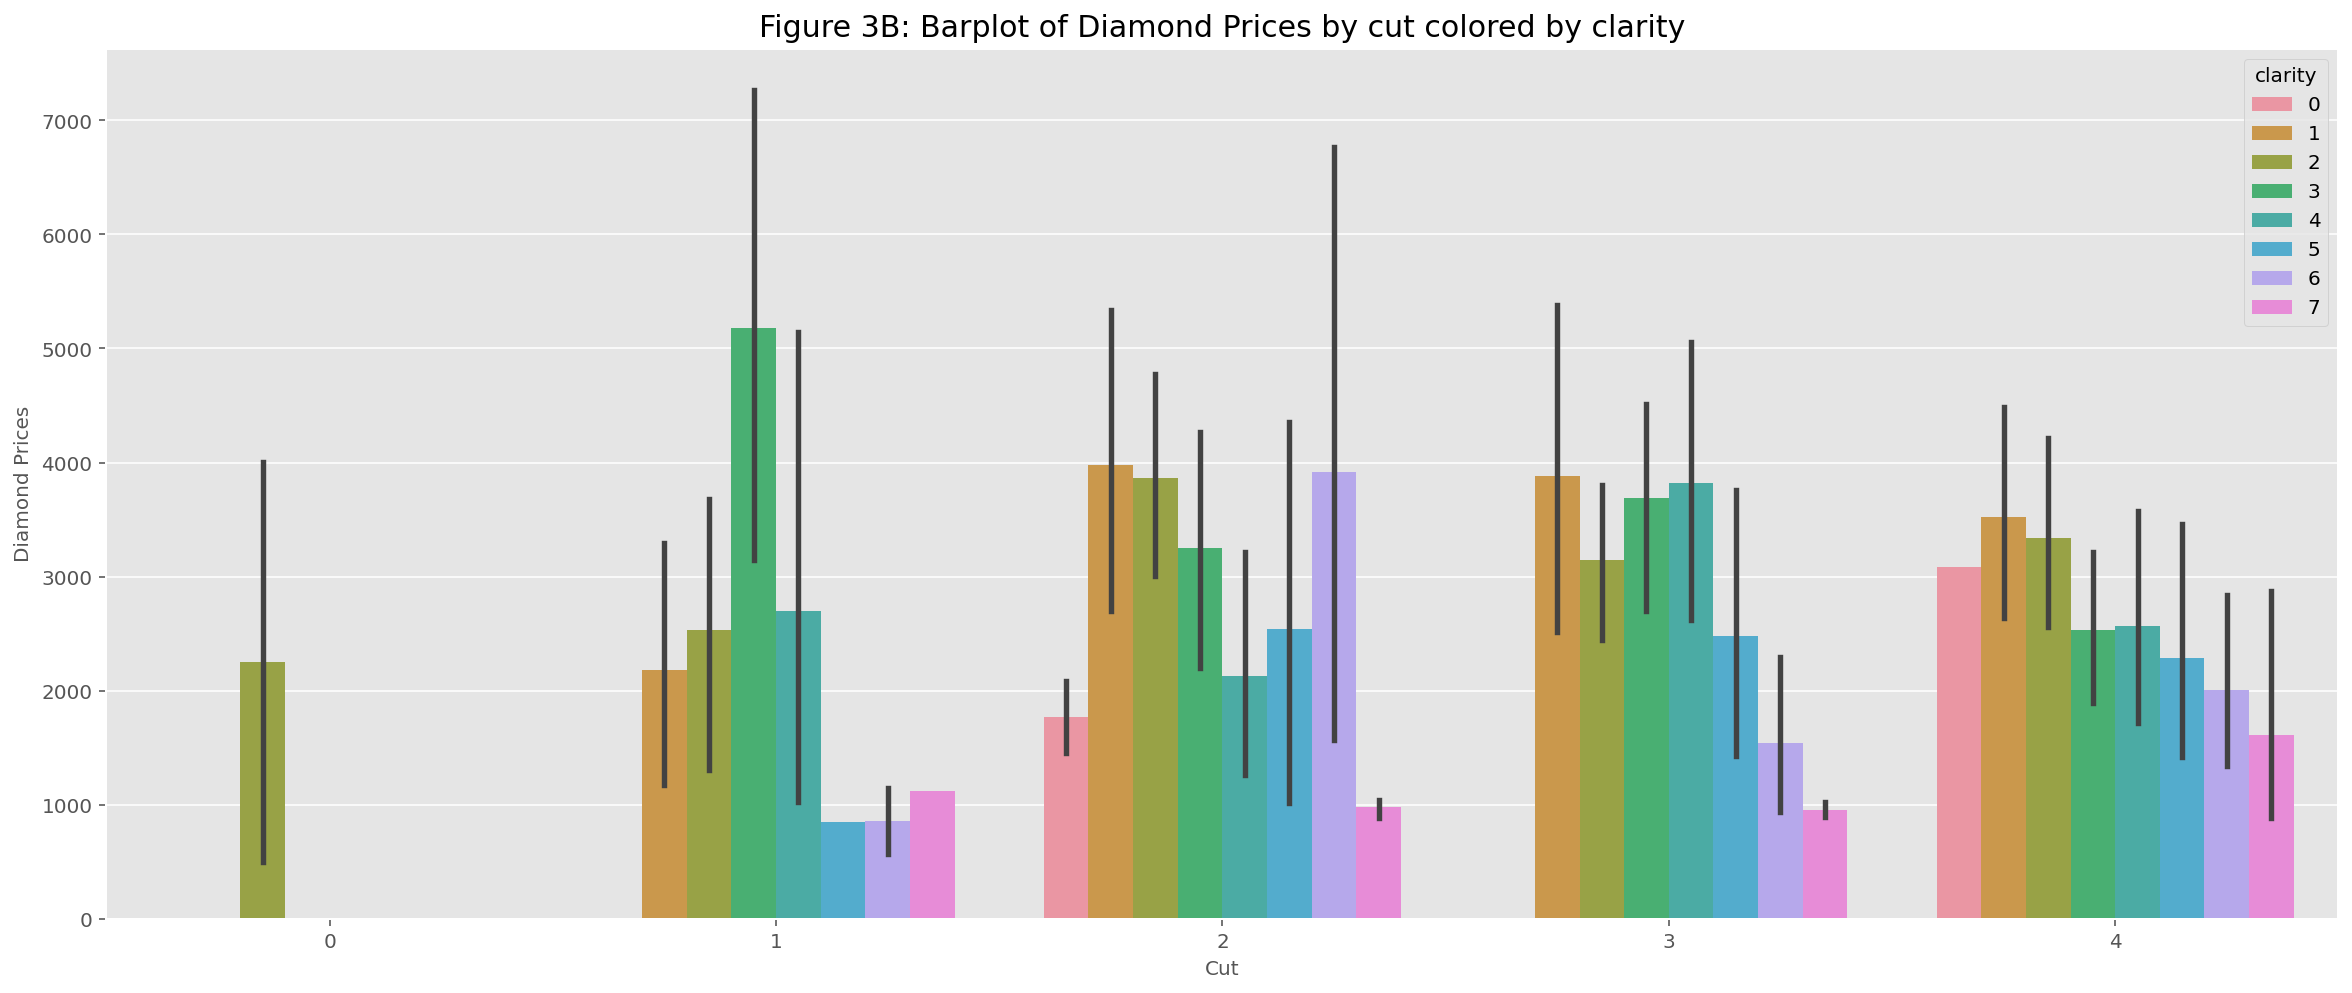

In [96]:
plt.figure(figsize = (20,8))
fig_4 = sns.barplot(x ='cut', y ='price', hue = 'clarity', data = df_copy)
plt.title('Figure 3B: Barplot of Diamond Prices by cut colored by clarity', fontsize = 15)
plt.xlabel('Cut', fontsize = 10)
plt.ylabel('Diamond Prices', fontsize = 10)

Text(0, 0.5, 'Diamond Prices')

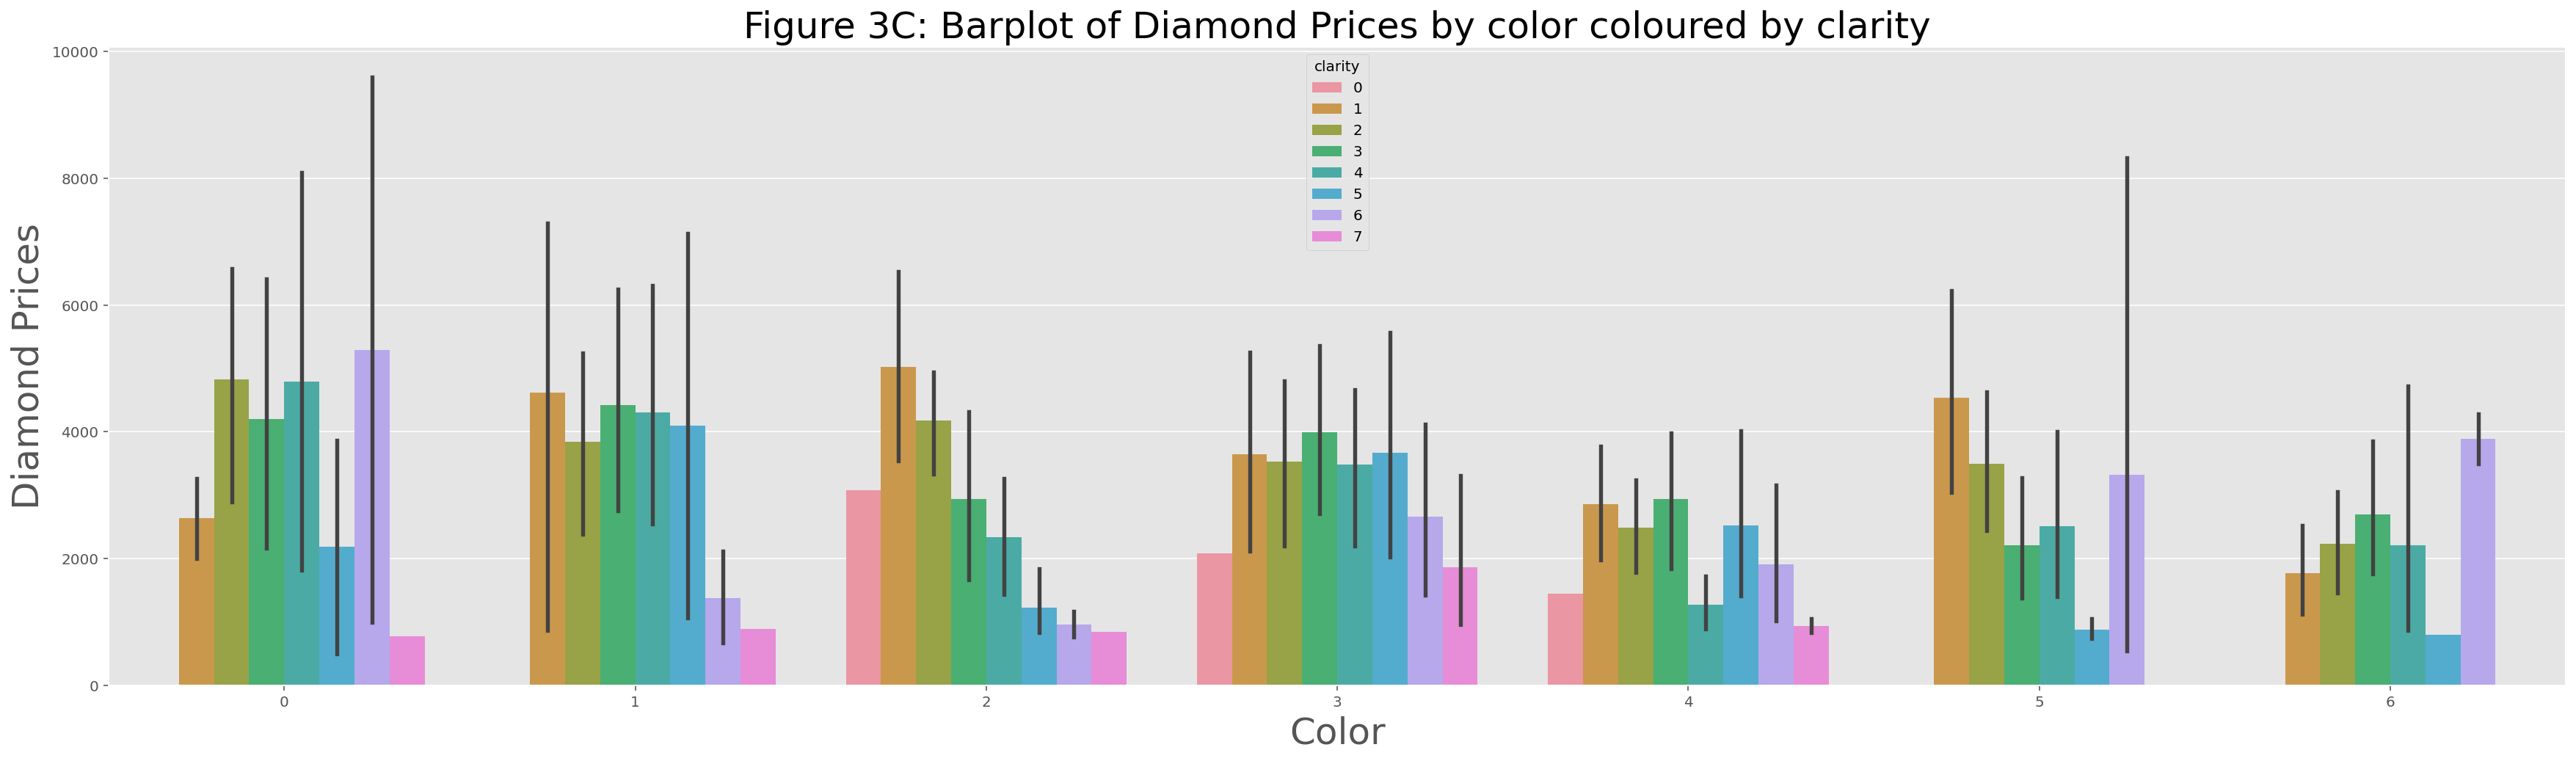

In [103]:
plt.figure(figsize = (30,8))
fig_4 = sns.barplot(x ='color', y ='price', hue = 'clarity', data = df_copy)
plt.title('Figure 3C: Barplot of Diamond Prices by color coloured by clarity', fontsize = 25)
plt.xlabel('Color', fontsize = 25)
plt.ylabel('Diamond Prices', fontsize = 25)

## Summary and Conclusion

The goal of this project was to come up with a predictive model in order to understand which descriptive features mostly influence the price of a diamond. 
In this phase of the project, we had the tasks of data cleaning & preprocessing and data visualisation. Our first step in this process was to check for null values within the dataset and drop them. The only variables containing null values were the numerical data, more specifically, the ‘x’, ‘y’, and ‘z’ columns. We also checked the data for any missing values and outliers, and we decided to again drop those rows. Finally, our last task in the cleaning process was to sample the data to get only 500 random rows. This was done in order to make the visualisation step smoother.  
 
After random sampling we discovered that the box plots contained outliers, even though we removed them previously. We later realised that, since we selected 500 random rows of the dataset, the spread would be different. That is, it could have sampled for the first 500 or the last 500, creating an uneven spread in the data.
 
Normalising the data to represent a normal distribution, as well as scaling would have helped with the accuracy of the analysis. Doing that, along with removing extreme outliers and and one-hot-encoding all of the categorical variables.
Using the several generated visualisations, we were able to perform a deep dive into the data. The descriptive features showed that a diamond of grade E is the most frequently made. The dimensions of the diamonds seemed to all share a strong positive correlation to the price, whereas,  the categorical features such as cut and clarity tend to have none. 
We also observed that some of the numerical data are skewed, including the target feature, Price. 
To handle this in the next phase, we plan to use Scaling/ transformation to normalise the data. 
We have noticed that the dimensions of the diamond seem to be the most significant features in determining the price, and that no other feature had a strong impact on the price. The correlation between the dimensions and the diamond price was also not linear, indicating again that there needs to be a transformation performed on the dataset.  Thus, further analysis is needed in order to identify any other relationships.


## References

Diamond color order:
- GIA 4Cs Color D-to-Z . (2021). Retrieved 3 October 2021, from https://www.gia.edu/gia-about/4cs-color

Diamond clarity order:
- Brilliant Earth. (2021). Retrieved 3 October 2021, from https://www.brilliantearth.com/diamond-clarity/ 

Diamond cut order:
- Diamond Cuts Guide: Overview, Grades, Quality and Price. (2021). Retrieved 3 October 2021, from https://www.diamonds.pro/education/cuts/